# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/...

**Task:**
직원의 학력 분포, 근무 장소, 근무 기간(입사년도), 급여 등급, 직무 경험, 성별 등 각 변수의 퇴사와 상관 관계 규명

**Datasets**

* Train dataset: ...

* Validation dataset: ...

* Test dataset: ...

**Features(x):**
-Education: 최종 학력
-Joining Year: 입사 연도
-City: 근무 장소
-Payment Tier : 급여 등급
-Age: 연령
-Gender : 성별
-Ever Benched: 할당된 직무 없이 일시적으로 작업을 수행한 적이 있는지 여부
-Experience in Current Domain : 현재 분야에서 쌓은 경력 기간(단위 : 년)

**Target(y):**
퇴사 여부 
0: 재직(퇴사 안함)
1: 퇴사

---

## Build Your Model

### Data preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
os.chdir(r"C:\Users\Sedaily\Desktop\개인\동국대 경영정보\2023년 2학기\머신러닝-딥러닝")

In [2]:
df=pd.read_csv("./Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


<Figure size 1008x720 with 0 Axes>

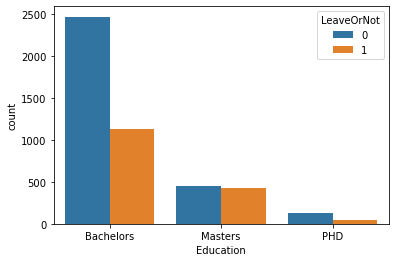

<Figure size 1008x720 with 0 Axes>

In [5]:
## 1. 학력 분포와 퇴사 여부 관계 -> 석사 학위가 상대적으로 높은 비율

sns.countplot(x='Education',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

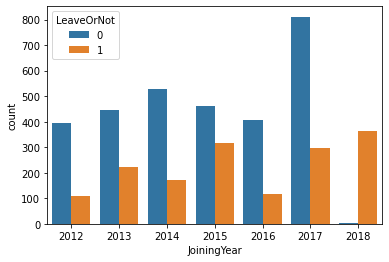

<Figure size 1008x720 with 0 Axes>

In [6]:
# 2. 입사 시기와 퇴사 여부 관계 ->  2018년도 입사자가 유일하게 퇴사 인원 > 잔류 인원  

sns.countplot(x='JoiningYear',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

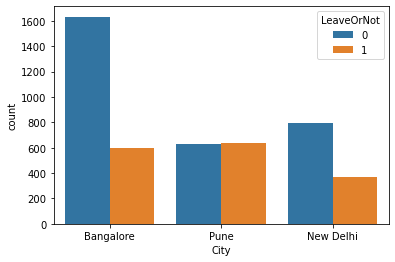

<Figure size 1008x720 with 0 Axes>

In [7]:
# 3. 근무 장소와 퇴사 여부 관계 -> Pune 지역이 상대적으로 퇴사자 비율 가장 높음   

sns.countplot(x='City',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

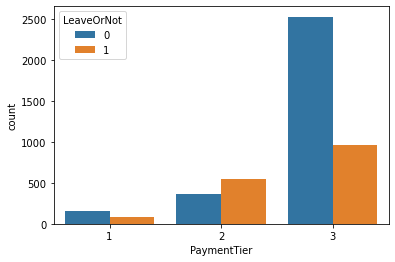

<Figure size 1008x720 with 0 Axes>

In [8]:
# 4. 급여 등급과 퇴사 여부 관계 -> 2등급이 가장 퇴사 비율 높고, 3등급은 낮음  

sns.countplot(x='PaymentTier',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

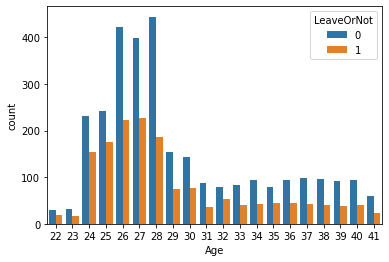

<Figure size 1008x720 with 0 Axes>

In [9]:
# 5. 연령과 퇴사 여부 관계 -> 그래프로는 판단 불가

sns.countplot(x='Age',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

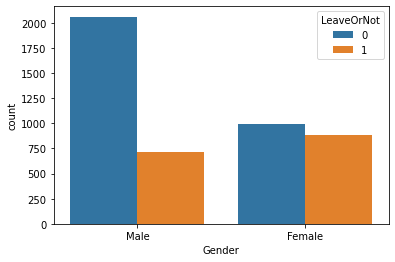

<Figure size 1008x720 with 0 Axes>

In [10]:
# 6. 성별과 퇴사 여부 관계 -> 여성이 남성보다 상대적으로 퇴사자 많음  

sns.countplot(x='Gender',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

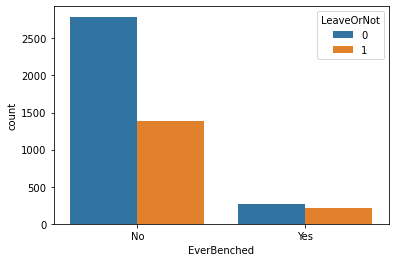

<Figure size 1008x720 with 0 Axes>

In [11]:
# 7. 대기 발령 여부와 퇴사 관계 -> 대기 발령 경험자가 상대적으로 높은 퇴사 비율 

sns.countplot(x='EverBenched',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

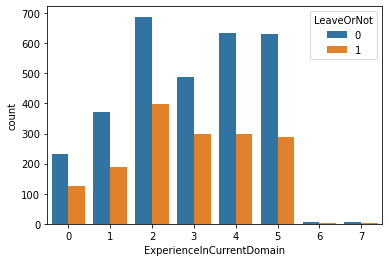

<Figure size 1008x720 with 0 Axes>

In [12]:
# 8. 직무 경력과 퇴사 관계 -> 6~7년이 가장 높은 비율 

sns.countplot(x='ExperienceInCurrentDomain',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

### Model Construction

In [13]:
le=LabelEncoder()  # 문자 데이터였던 학력, 근무장소, 성별, 대기발령 여부를 숫자로 변환 

In [14]:
df['Education']=le.fit_transform(df['Education'])
df['City']=le.fit_transform(df.City)
df['Gender']=le.fit_transform(df['Gender'])
df['EverBenched']=le.fit_transform(df['EverBenched'])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [15]:
target=df['LeaveOrNot']
y=target
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [16]:
X=df.drop(['LeaveOrNot'],axis='columns')
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [17]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


퇴사와 상관 관계 있는 요인은 학력, 입사연도, 근무장소, 대기발령 여부

### Train Model & Select Model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
lr=LogisticRegression(max_iter=4000)

In [20]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [21]:
lr.score(X_test,y_test)

0.7213467048710601

In [22]:
dtc=DecisionTreeClassifier()

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
dtc.score(X_test,y_test)

0.8330945558739254

In [25]:
sv = svm.SVC(C = 40, kernel = 'rbf')
sv.fit(X_train,y_train)

SVC(C=40)

In [26]:
sv.score(X_test,y_test)

0.6590257879656161

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, Flatten

ModuleNotFoundError: No module named 'tensorflow'

## Performance

In [ ]:
## codes

The results explains

....